MSE: 182937143195.07
RMSE: 427711.52
MAE: 135991.14
R² Score: -0.74


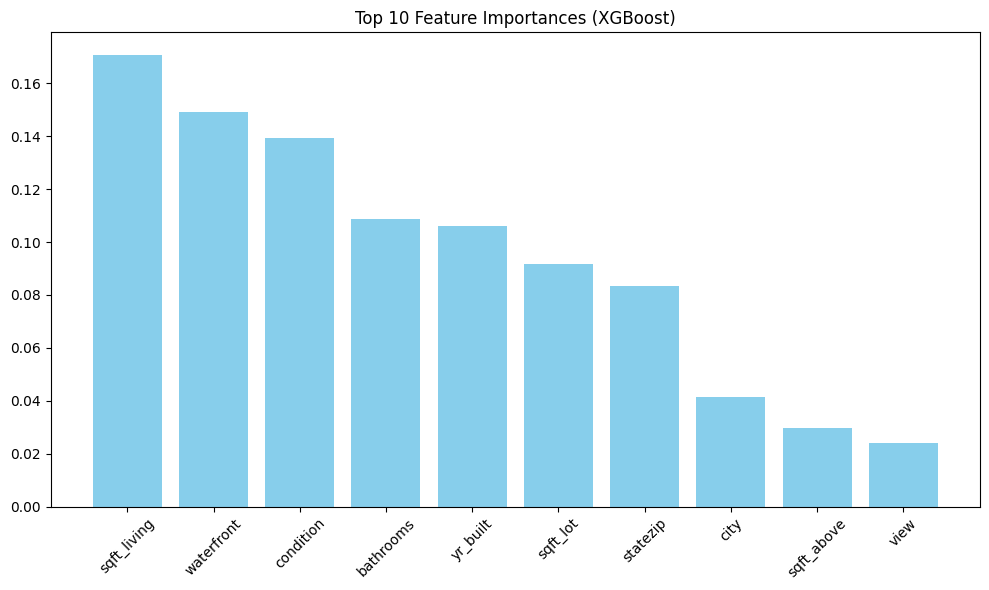

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

df = pd.read_csv("Usa Housing Dataset.csv")
df = df.drop(['date', 'street', 'country'], axis=1)

le = LabelEncoder()
df['city'] = le.fit_transform(df['city'])
df['statezip'] = le.fit_transform(df['statezip'])

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

importances = model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1][:10]

plt.figure(figsize=(10, 6))
plt.bar(feature_names[sorted_indices], importances[sorted_indices], color='skyblue')
plt.title('Top 10 Feature Importances (XGBoost)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

